In [20]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

print("Matplotlib version", matplotlib.__version__)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Matplotlib version 3.1.2


## Load Dataset

In [21]:
train = pd.read_csv("data/train.csv")

In [22]:
# 앞의 5줄의 데이터만 보여준다.
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
test = pd.read_csv("data/test.csv")

In [24]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Explore

In [25]:
import seaborn as sns

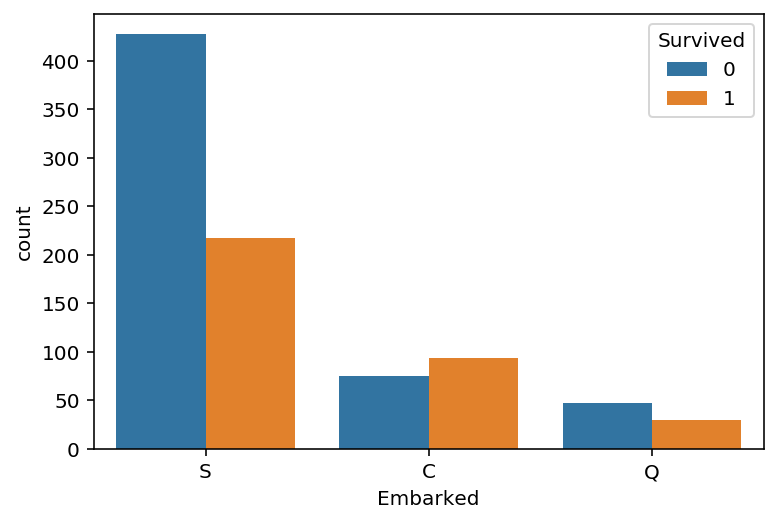

In [26]:
sns.countplot(data=train, x="Embarked", hue="Survived")

- Cherbourg 에서 탑승한 승객들의 생존률이 높다는 것을 알 수 있다. 
- 추측하기로는 upper class 탑승객 비율이 많다. 


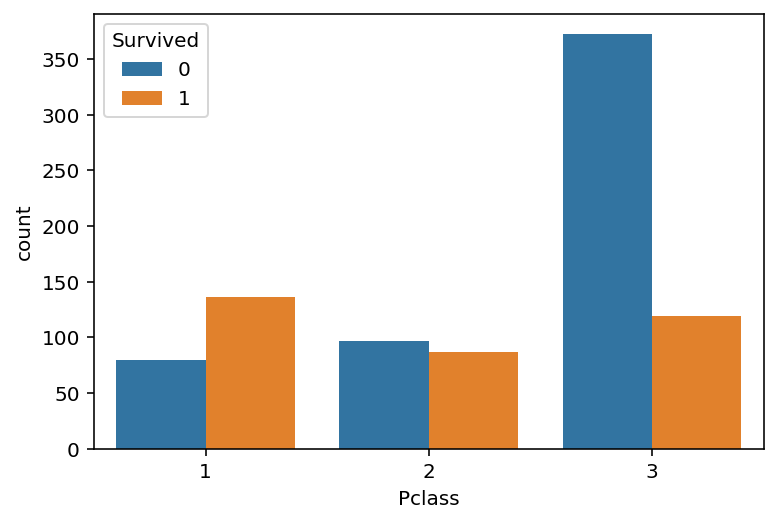

In [27]:
sns.countplot(data=train, x="Pclass", hue="Survived")

- 3등급 탑승객은 생존자보다 사망자 수가 더 많다. 
- 1등급에 탑승해야 생존률이 높다. 

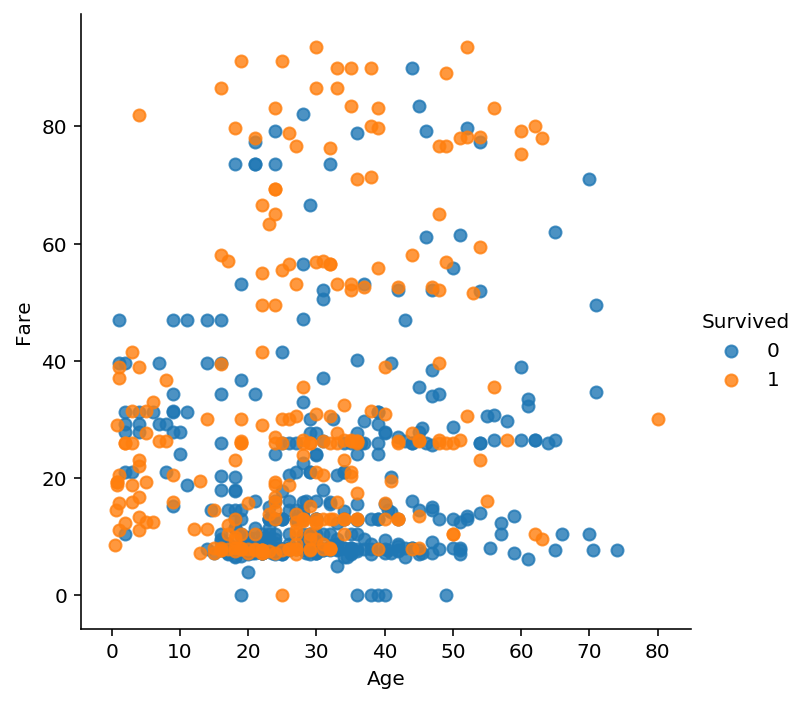

In [28]:
# low_fare = train[train["Fare"] < 500]  # 500$ 이상 탑승객 outlier 제거 
low_fare = train[train["Fare"] < 100]
sns.lmplot(data=low_fare, x="Age", y="Fare", hue="Survived", fit_reg=False)

- 회귀선, 추세선 , 추후에 데이터량이 많아지면 시각화하는데 시간이 많이 걸린다. 
- `fit_reg=False` 옵션을 추가해 추세선을 지워준다. 
- ` hue="Survived"` - 주황색은 생존자 , 파란색은 사망자 
- 특정 구역에 주황색이 몰려있으면 살아날 확률이 높다. 
- Fare - Fare paid for ticket (운임요금 `$`로 기입)
- 운임요금이 생존률에 영향을 많이 끼친다. 
- 특정 나이대 생존률도 차이가 난다. (10살 미만)




### preprogressing

#### Encode Sex

In [69]:
# Sex data 1, 0 encode 해서 저장 
train["Sex_encode"] = train["Sex"].replace("male", 0).replace("female", 1)
train[["Sex", "Sex_encode"]].head()

,Sex,Sex_encode
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0


In [70]:
# Test data도 전처리 

test["Sex_encode"] = test["Sex"].replace("male", 0).replace("female", 1)
test[["Sex", "Sex_encode"]].head()

,Sex,Sex_encode
0,male,0
1,female,1
2,male,0
3,male,0
4,female,1


### Fill in missing Fare 

In [93]:
test["Fare"] = test["Fare"].fillna(0)
                    
# NaN (Not a Number), null
test[test["Fare"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode


### Train 

In [94]:
# Feature(x) - Pclass, Sex, Fare 
# Label(y) - Survived

In [95]:
feature_names = ["Pclass", "Sex_encode","Fare"]
feature_names

['Pclass', 'Sex_encode', 'Fare']

In [96]:
x = train[feature_names]
x.head()

,Pclass,Sex_encode,Fare
0,3,0,7.2500
1,1,1,71.2833
2,3,1,7.9250
3,1,1,53.1000
4,3,0,8.0500


In [97]:
label_name = "Survived"
y = train[label_name]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### Use Decision Tree

In [100]:
# scikit-learn == sklearn 
# import sklearn

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth = 5)
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [101]:
model.fit(x, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Visualize

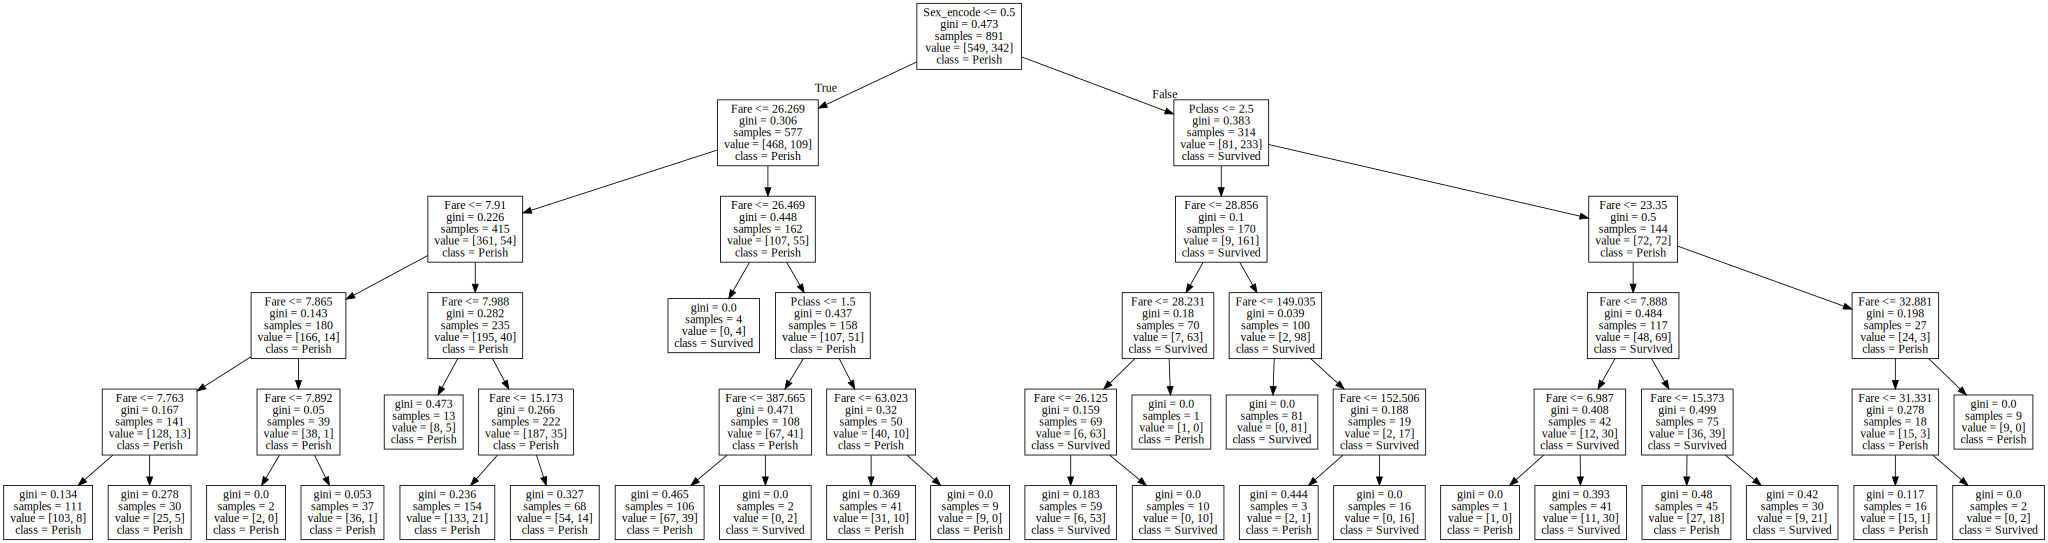

In [102]:
import graphviz
from sklearn.tree import export_graphviz

tree = export_graphviz(model,
                       feature_names = feature_names,
                       class_names = ["Perish", "Survived"])
graphviz.Source(tree)
                       

### predict


In [103]:
# test data feature

x_test = test[feature_names]

x_test.head()

,Pclass,Sex_encode,Fare
0,3,0,7.8292
1,3,1,7.0000
2,2,0,9.6875
3,3,0,8.6625
4,3,1,12.2875


In [104]:
# train으로 학습한 모델에 예측

prediction_list = model.predict(x_test)
prediction_list[0:5]


array([0, 1, 0, 0, 0])

### Submit

In [105]:
# gender_submission 은 kaggle 에서 요구하는 제출 포맷이다.

submit = pd.read_csv("data/gender_submission.csv")
submit["Survived"] = prediction_list

submit.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


### csv file 형태로 저장하기 

In [106]:
submit.to_csv("decision-tree-fare.csv", index = False)